# Assignment # 06_ Big Data _ 02324029_ Suleman Khan

# Mission #1: Download the following five stock index information from Yahoo Finance and compare the changes.
#       Index Name Ticker Symbol
# 1: Nasdaq Composite Index ^IXIC
# 2: S&P 500 Index ^GSP
# 3: Dow Jones Industrial Average ^DJ
# 4: Shanghai Composite Index 000001.SS
# 5: KOSPI Index ^KS11

In [1]:
# Import the required libraries
import yfinance as yf
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Define the stock indices and the time period
indices = {
    "Nasdaq_Composite_Index": "^IXIC",
    "S&P_500_Index": "^GSPC",
    "Dow_Jones_Industrial_Average": "^DJI",
    "Shanghai_Composite_Index": "000001.SS",
    "KOSPI_Index": "^KS11"
}

start_date = '2019-01-01'
end_date = '2022-12-31'

# Connect to SQLite3 and create the database
conn = sqlite3.connect('indices_data.db')
cursor = conn.cursor()

# Download stock index data from Yahoo Finance and store in SQLite
for index_name, ticker in indices.items():
    # Step 4: Download data using yfinance
    df = yf.download(ticker, start=start_date, end=end_date)
    
    # Clean the data (remove any rows with missing values)
    df.dropna(inplace=True)
    
    # Save the data into a new table in SQLite3
    df.to_sql(index_name, conn, if_exists='replace')
    print(f"Data for {index_name} saved to database.")

# Close the connection
conn.close()

[*********************100%***********************]  1 of 1 completed


Data for Nasdaq_Composite_Index saved to database.


[*********************100%***********************]  1 of 1 completed


Data for S&P_500_Index saved to database.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data for Dow_Jones_Industrial_Average saved to database.


Data for Shanghai_Composite_Index saved to database.


[*********************100%***********************]  1 of 1 completed


Data for KOSPI_Index saved to database.


# Mission #2: After reading the values of the Close column from the DB Table, a CSV file is created by index and date.
# 1. Read the Close values from each created DB Table to create five different dataframes.
# 2. Read the values of the Close column from the data frames for each index and create one csv file consisting of the Close values by date and index.

In [2]:
# Connect to the SQLite3 database
conn = sqlite3.connect('indices_data.db')

# Define the stock indices and their corresponding table names
indices = {
    "Nasdaq_Composite_Index": "Nasdaq_Composite_Index",
    "S&P_500_Index": "S&P_500_Index",
    "Dow_Jones_Industrial_Average": "Dow_Jones_Industrial_Average",
    "Shanghai_Composite_Index": "Shanghai_Composite_Index",
    "KOSPI_Index": "KOSPI_Index"
}

# Initialize an empty dictionary to store Close column data for each index
close_values = {}

# Read the 'Close' values from each table in the database
for index_name, table_name in indices.items():
    # Escape table name by enclosing it in double quotes
    query = f'SELECT Date, Close FROM "{table_name}"'
    df = pd.read_sql(query, conn)
    
    # Rename the Close column to the index name for clarity
    df.rename(columns={'Close': index_name}, inplace=True)
    
    # Store the dataframe in the dictionary
    close_values[index_name] = df

# Merge all the dataframes on the 'Date' column
final_df = close_values["Nasdaq_Composite_Index"]

# Merge the rest of the dataframes by 'Date'
for index_name in list(indices.keys())[1:]:
    final_df = final_df.merge(close_values[index_name], on="Date", how="inner")

# Save the merged dataframe to a CSV file
final_df.to_csv("02423029_Suleman Khan.csv", index=False)

# Close the connection to the database
conn.close()

print("CSV file '02423029_Suleman Khan.csv' created successfully!")

stock_indices_close_values = pd.read_csv("02423029_Suleman Khan.csv")
stock_indices_close_values.head()

CSV file '02423029_Suleman Khan.csv' created successfully!


Date  Nasdaq_Composite_Index  S&P_500_Index  \
0  2019-01-02 00:00:00             6665.939941    2510.030029   
1  2019-01-03 00:00:00             6463.500000    2447.889893   
2  2019-01-04 00:00:00             6738.859863    2531.939941   
3  2019-01-07 00:00:00             6823.470215    2549.689941   
4  2019-01-08 00:00:00             6897.000000    2574.409912   

   Dow_Jones_Industrial_Average  Shanghai_Composite_Index  KOSPI_Index  
0                  23346.240234               2465.291016  2010.000000  
1                  22686.220703               2464.363037  1993.699951  
2                  23433.160156               2514.867920  2010.250000  
3                  23531.349609               2533.089111  2037.099976  
4                  23787.449219               2526.461914  2025.270020

# Mission #3: Read values from a csv file and plot them as a line graph with the values for 5 indices.

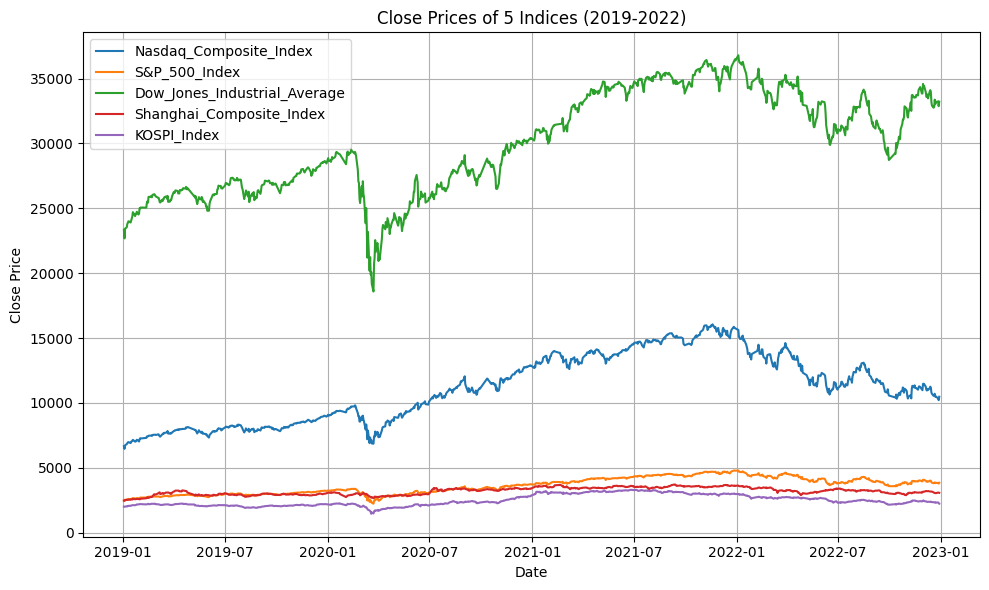

In [3]:
# Read the CSV file containing Close prices
df_close_combined = pd.read_csv('02423029_Suleman Khan.csv', index_col='Date', parse_dates=True)

# Plot the Close prices and save the plot as a PNG file
plt.figure(figsize=(10, 6))

# Plot each index's Close price
for column in df_close_combined.columns:
    plt.plot(df_close_combined.index, df_close_combined[column], label=column)

# Set the title and labels
plt.title('Close Prices of 5 Indices (2019-2022)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.grid(True)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('02423029_Suleman Khan.png')


# End of Assignment# 06_ Big Data (02423029_Suleman Khan)